In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Number                                                                             395 non-null    int64  
 1   Age                                                                                395 non-null    float64
 2   Gender                                                                             395 non-null    object 
 3   RMDQ (0-23)                                                                        395 non-null    int64  
 4   Nerve root compression on MRI                                                      395 non-null    int64  
 5   Confidence in diagnosis (0-100%)                                                   395 non-null    int64  

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




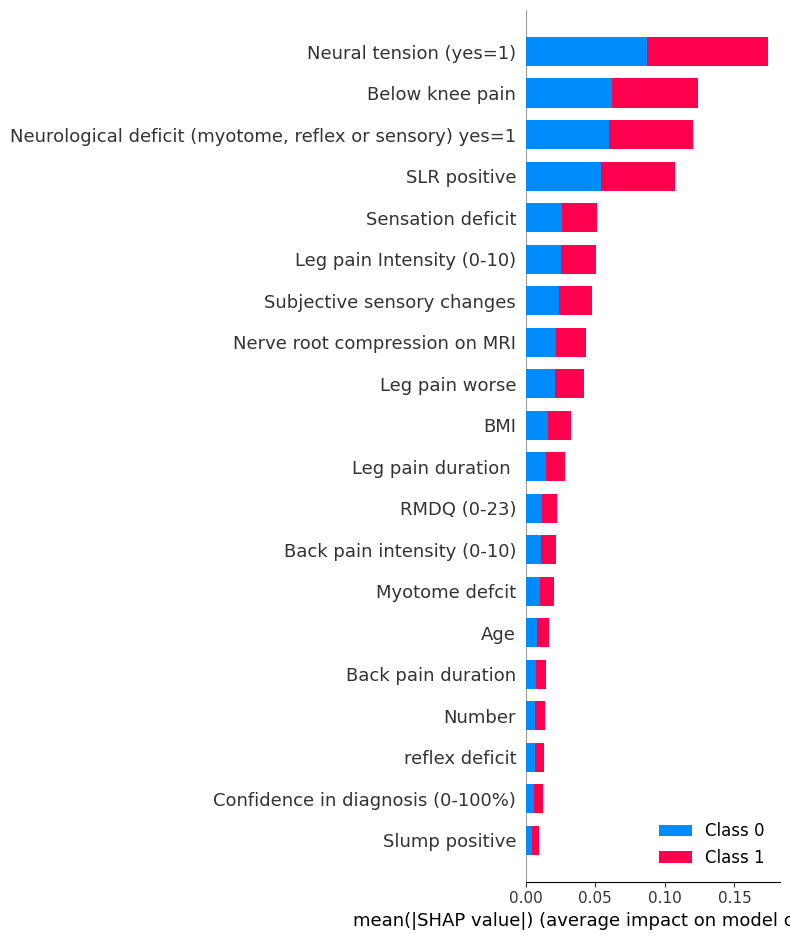

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import shap

# Load Dataset (Replace 'your_data.csv' with actual file)
df = pd.read_csv('/kaggle/input/scitica-prediction-dataset/scitica_dataset.csv')

# Display basic info
print(df.info())
print(df.head())

# Handle missing values separately for numerical and categorical columns
df_num = df.select_dtypes(include=['number'])  # Select numerical columns
df_cat = df.select_dtypes(include=['object'])  # Select categorical columns

df_num.fillna(df_num.median(), inplace=True)  # Fill numeric missing values with median
for col in df_cat.columns:
    df_cat[col].fillna(df_cat[col].mode()[0], inplace=True)  # Fill categorical missing values with mode

# Merge processed numerical and categorical columns
df = pd.concat([df_num, df_cat], axis=1)


# Encoding Categorical Variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Splitting Features & Target
X = df.drop(columns=['Clinician diagnosis sciatica (1=yes)'])  # Replace 'Sciatica' with actual target column
y = df['Clinician diagnosis sciatica (1=yes)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Feature Importance with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X.columns)


In [17]:
import pandas as pd


# Select feature and target
features = X  # Replace with actual column name
target = y  # Replace with actual target column name
corr_df = {'Feature':[] , 'Correlation':[]}
# Compute correlation for each feature
for feature in X.columns:  # Loop over column names
    correlation = X[feature].corr(y)  # Compute correlation
    corr_df['Feature'].append(feature)
    corr_df['Correlation'].append(correlation)
corr_df = pd.DataFrame(corr_df)
corr_df = corr_df.sort_values(by="Correlation", key=abs, ascending=False)
print(corr_df)

                                              Feature  Correlation
14                             Neural tension (yes=1)     0.605246
13                                    Below knee pain     0.540417
19                                       SLR positive     0.538883
15  Neurological deficit (myotome, reflex or senso...     0.491723
10                                     Leg pain worse     0.409031
6                           Leg pain Intensity (0-10)     0.375421
17                                  Sensation deficit     0.373146
3                       Nerve root compression on MRI     0.324706
16                                     Myotome defcit     0.295710
12                         Subjective sensory changes     0.293402
11                              Cough/sneeze positive     0.250401
18                                     reflex deficit     0.249411
22                                     Slump positive     0.224413
2                                         RMDQ (0-23)     0.15

Yes, a small dataset can definitely cause some problems when training machine learning models, leading to suboptimal performance. Here's how a small dataset can affect your results and some strategies to mitigate the challenges:

### Challenges with Small Datasets:

1. **Overfitting**:
   - **Problem**: Small datasets lead to overfitting, where the model learns the noise or specific patterns of the training data rather than generalizable patterns. This results in high accuracy on the training data but poor performance on new, unseen data.
   - **Solution**: 
     - **Regularization**: Use regularization techniques like **L1** (Lasso) or **L2** (Ridge) for models like **Logistic Regression** and **SVM** to reduce overfitting.
     - **Cross-Validation**: Use **k-fold cross-validation** to ensure the model is not just memorizing the data but generalizing well to different subsets of the data.
     - **Ensemble Methods**: Methods like **Random Forest** or **XGBoost** can help to smooth out fluctuations due to the limited training data.

2. **Lack of Diversity**:
   - **Problem**: A small dataset may not capture the full diversity of the patterns and relationships within the data, leading to poor generalization.
   - **Solution**: 
     - **Synthetic Data Generation**: Use techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) to generate synthetic examples, especially if you have class imbalance.
     - **Data Augmentation**: If your dataset is for images or time-series data, consider augmenting the data by rotating, flipping, or adding noise (in the case of images), or applying jitter or transformations for time-series.

3. **Insufficient Learning**:
   - **Problem**: Models like deep learning (Neural Networks) or even decision trees can perform poorly if there is not enough data to learn from.
   - **Solution**:
     - **Simpler Models**: Use simpler models like **Logistic Regression**, **SVM**, or **KNN** that require less data to train and are less prone to overfitting on small datasets.
     - **Data Preprocessing**: Ensure your data is preprocessed properly—handling missing values, encoding categorical variables, and scaling numerical features effectively. This ensures that even with fewer data points, the model can learn from the most important features.

4. **Bias in Model**:
   - **Problem**: If the dataset is small, the model might be highly sensitive to any bias present in the data, leading to poor generalization.
   - **Solution**:
     - **Data Augmentation** (if applicable): As mentioned earlier, creating more diverse data samples can help combat any bias present in the data.
     - **Bootstrap Sampling**: Use resampling methods (like **bootstrapping**) to generate multiple datasets from your small dataset, which can help improve stability and reliability of model training.

5. **Limited Evaluation**:
   - **Problem**: With small datasets, it’s hard to assess the model’s performance reliably, as a single split might not represent the data distribution well.
   - **Solution**:
     - **Cross-Validation**: Ensure you're using **cross-validation** to assess the model’s performance and minimize variance in model evaluation.
     - **Holdout Set**: Reserve a portion of your data for testing purposes, ensuring you evaluate performance on data the model has never seen before.

---

### Specific Approaches for Small Datasets:

1. **Transfer Learning** (if applicable):
   - If you're working with image or text data, you can use **pretrained models** and fine-tune them on your small dataset. For instance, using a pretrained **CNN** for image classification or **BERT** for text tasks can help leverage knowledge from larger datasets.

2. **Simple Models with Strong Regularization**:
   - Models like **Logistic Regression** or **SVM** (with the right kernel and regularization) tend to work better on small datasets, as they are less complex and easier to train with fewer data points.

3. **Bootstrapping**:
   - This technique involves resampling your data with replacement to generate different training sets. It can help reduce variance and improve the model’s robustness by training it on multiple versions of your data.

4. **Prioritizing High-Quality Features**:
   - Given that you’ve already selected the top 7 features based on correlation, ensure these features are highly informative. Using feature selection methods like **RFE (Recursive Feature Elimination)** can help eliminate any less useful features and ensure the model uses only the most predictive attributes.

5. **Synthetic Data**:
   - For certain problems, especially in classification with class imbalance, **SMOTE** (for generating synthetic minority class examples) or **ADASYN** (for adaptive synthetic sampling) can help you artificially increase the dataset size.

---

### Conclusion:

Small datasets do create challenges for machine learning, particularly in terms of overfitting and limited learning capacity. However, by following the strategies outlined above—regularization, cross-validation, synthetic data generation, using simpler models, and ensuring data quality—you can improve the model’s ability to generalize and make the most out of your limited data. 

Would you like more information on how to implement any of these strategies or suggestions for tools to help with your specific case?